<a href="https://www.kaggle.com/code/sandhyakrishnan02/imbalance-insurance-data-analysis?scriptVersionId=99344582" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a class="anchor" id="0.1"></a>
# **Table of Contents** 

[1. What is Class Imbalance](#1) 

[2. How Imbalanced is the data?](#2) 

[3. Impact of Class Imbalance Data](#3)

[4. How to Handle Imbalanced Classes?](#4)

[5. Importing Libraries and Files](#5) 

[6. EDA](#6) 

[7. Encoding Categorical Features](#7) 

[8. Splitting data set to training and Test set](#8) 

[9. Feature Scaling](#9) 

[10. Random Sampling](#10) 

* [10.1 Oversample minority class](#10.1) 

* [10.2 Undersample majority class](#10.2)

* [10.3. SMOTE](#10.3)

[11. Reference](#11)

<a id="1"></a> <br>
# 1. What is Class Imbalance

Class Imbalance occurs when most data belong to one class or when the distribution of samples across the known classes is biased or skewed. To know more about skewness and normal distribution you can check my [notebook](https://www.kaggle.com/sandhyakrishnan02/normal-distribution-skewness-and-kurtosis)


If a dataset have positive and negative target, in case of class imbalance the total number of a positive class of data is far less than the total number of negative class of data.  
 
For example, when target belongs to two classes “Yes” and “No” and 90% of data belong to “Yes” class. 

Class imbalance occurs in two-class classification problems as well as multi-class classification problems.

<a id="2"></a> <br>
# 2. How Imbalanced is the data?

balanced_accuracy_score : 
The balanced accuracy in binary and multiclass classification problems is to deal with imbalanced datasets.It is defined as the average of recall obtained on each class.The best value is 1 and the worst value is 0.

accuracy_score : 
It is known as Accuracy classification score. 
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

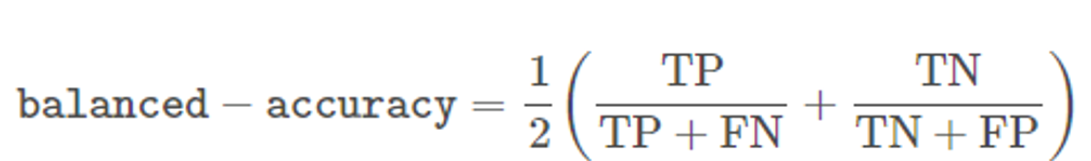

For balanced dataset the balanced_accuracy_score becomes equivalent to the accuracy_score. 


<a id="3"></a> <br>
# 3. Impact of Class Imbalance Data

Most machine learning algorithms assume data equally distributed. So, when we have a class imbalance, the machine learning classifier tends to be more biased towards the majority class, causing bad classification of the minority class. A major issue in the classification of class imbalanced datasets involves the determination of the most suitable performance metrics to be used. 

Conventional algorithms are often biased towards the majority class because their loss functions attempt to optimize quantities such as error rate, not taking the data distribution into consideration. In the worst case, minority class are treated as outliers of the majority class and ignored. The learning algorithm simply generates a trivial classifier that classifies every example as the majority class.


<a id="4"></a> <br>
# 4. How to Handle Imbalanced Classes?

[Go to Top](#0.1)

**1. Changing Performance Metric :**

For a classification problem, the performance is mainly figured out by using classification accuracy. For high imbalance class, the model will predict the value of the majority class for all predictions and  achieve a high classification accuracy.  But this model is not useful in the problem domain. This is called the Accuracy Paradox. To overcome this, other performance metric is to be considered for evaluation, we can use confusion matrix, precision, recall and F1 score.

   * Confusion Matrix: a table showing correct predictions and types of incorrect predictions
    
   * Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
    
   * Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
    
   * F1 Score: the weighted average of precision and recall.
  
**2. Resampling**

   Resampling consist of 
   * Under sampling of the majority class: This technique involves removing random records from the majority class, which can cause loss of information. This could lead to underfitting and poor generalization to the test set. 
   * Oversampling of the minority class: Adding more examples from the minority class. The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. 
    
   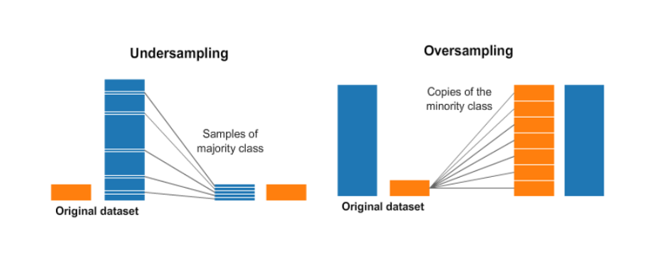
    
**3.  SMOTE (Synthetic Minority Over-sampling Technique):**

   An oversampling technique that generates synthetic samples from the minority class. SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbors from the data are set. Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen. The synthetic points are added between the chosen point and its neighbors. It can be used when we can both classes can be seperated easily. 
    
   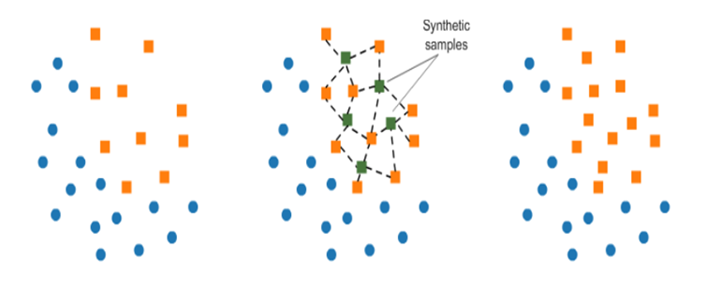

**4.  XGBoost (Extreme Gradient Boosting)** 

It is an advanced and more efficient implementation of gradient boosted decision trees designed for speed and performance. It is 10 times faster than the normal Gradient Boosting as it implements parallel processing. It is highly flexible as users can define custom optimization objectives and evaluation criteria, has an inbuilt mechanism to handle missing values. Unlike gradient boosting which stops splitting a node as soon as it encounters a negative loss, XG Boost splits up to the maximum depth specified and prunes the tree backward and removes splits beyond which there is an only negative loss. Extreme gradient boosting can be done using the XGBoost package in R and Python.

   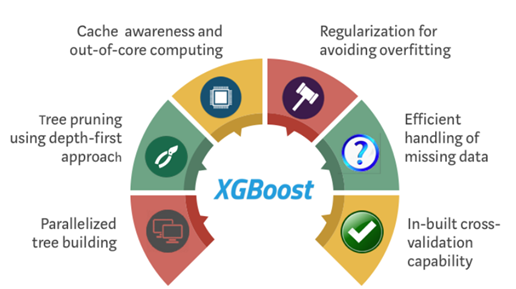
    
**5. Tree Based Algorithms**

Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes. In modern applied machine learning, tree ensembles like Random Forests, Gradient Boosted Trees, etc. almost always outperform singular decision trees.    
    
    
 Here Resampling and SMOTE is covered.
    
    
    


<a id="5"></a> <br>
# 5. Importing Libraries and Data File

[Go to Top](#0.1)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#For Sampling
from sklearn.utils import resample


#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
#Evaluation
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../input/imbalanced-data-practice/aug_train.csv')
df_test = pd.read_csv('../input/imbalanced-data-practice/aug_test.csv')

<a id="6"></a> <br>
# 6. EDA

[Go to Top](#0.1)

In [3]:
df.head().style.background_gradient(cmap='Dark2_r')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.000000,1,< 1 Year,No,2630.000000,152.000000,16,0
1,17163,Male,42,1,28.000000,0,1-2 Year,Yes,43327.000000,26.000000,135,0
2,32023,Female,66,1,33.000000,0,1-2 Year,Yes,35841.000000,124.000000,253,0
3,87447,Female,22,1,33.000000,0,< 1 Year,No,27645.000000,152.000000,69,0
4,501933,Male,28,1,46.000000,1,< 1 Year,No,29023.000000,152.000000,211,0


* All coloured columns are numerical columns
* White column indicates categorical variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [5]:
print("Number of rows in Training set is = ", df.shape[0], " \nNumber of columns in Training set is = " , df.shape[1]) 

Number of rows in Training set is =  382154  
Number of columns in Training set is =  12


In [6]:
print("Number of rows in Test set is = ", df_test.shape[0], " \nNumber of columns in Test set is = " , df_test.shape[1]) 

Number of rows in Test set is =  78273  
Number of columns in Test set is =  11


<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#dda15e;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px">

<h3 style="padding: 20px; color:white; text-align:center"><b>Missing values analysis</b></h3>
</div>

In [7]:
df.isnull().sum().sum()

0

In [8]:
df_test.isnull().sum().sum()

0

**There is no missing values in both test and training set**

<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#dda15e;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px">

<h3 style="padding: 20px; color:white; text-align:center"><b>Statistical Analysis of Numerical Columns</b></h3>
</div>

In [9]:
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]
df_num.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,22,1,7.0,1,2630.0,152.0,16,0
1,17163,42,1,28.0,0,43327.0,26.0,135,0
2,32023,66,1,33.0,0,35841.0,124.0,253,0
3,87447,22,1,33.0,0,27645.0,152.0,69,0
4,501933,28,1,46.0,1,29023.0,152.0,211,0


In [10]:
df_num.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
id,382154.000000,234392.953477,139527.487326,1.000000,115006.250000,230461.500000,345434.750000,508145.000000
Age,382154.000000,38.545691,15.226897,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,382154.000000,0.998108,0.043455,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,382154.000000,26.406867,13.181241,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,382154.000000,0.489182,0.499884,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,382154.000000,30711.271362,17061.595532,2630.000000,24546.000000,31692.000000,39447.750000,540165.000000
Policy_Sales_Channel,382154.000000,111.939812,54.286511,1.000000,26.000000,145.000000,152.000000,163.000000
Vintage,382154.000000,154.189429,83.735107,10.000000,81.000000,154.000000,227.000000,299.000000
Response,382154.000000,0.163811,0.370104,0.000000,0.000000,0.000000,0.000000,1.000000


<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#dda15e;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px">

<h3 style="padding: 20px; color:white; text-align:center"><b>Heat Map for correlation of numerical features</b></h3>
</div> 

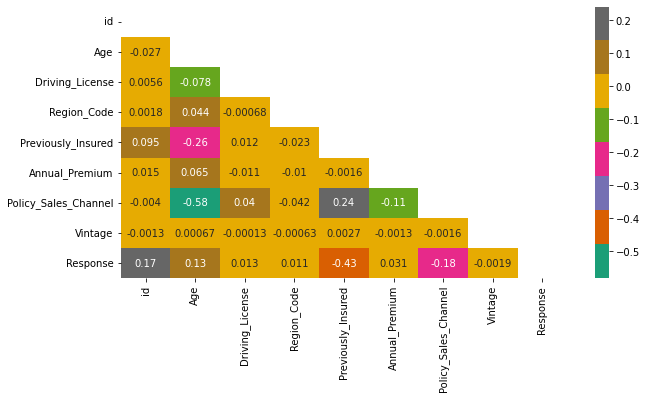

In [11]:
plt.figure(figsize=(10,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='Dark2');

In [12]:
correlation = (pd.DataFrame(df_num.corr().Response))
correlation.sort_values(by='Response', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Response
Response,1.000000
id,0.166621
Age,0.133149
Annual_Premium,0.030777
Driving_License,0.013250
Region_Code,0.011289
Vintage,-0.001884
Policy_Sales_Channel,-0.184514
Previously_Insured,-0.431224


In [13]:
df.drop('id',axis=1,inplace=True)

<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#dda15e;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px">

<h3 style="padding: 20px; color:white; text-align:center"><b>Target Analysis & Visualization</b></h3>
</div> 

[Go to Top](#0.1)

In [14]:
df['Response'].value_counts() 

0    319553
1     62601
Name: Response, dtype: int64

In [15]:
#Count of Class zero
Response_0 =len(df[df["Response"]==0])
Response_0

319553

In [16]:
#Count of Class One
Response_1 =len(df[df["Response"]==1])
Response_1

62601

In [17]:
Total = len(df['Response'])

In [18]:
Percentage_Response_Zero = Response_0/Total
print("Percentage of Response_Zero is    : ",Percentage_Response_Zero*100)
Percentage_Response_One = Response_1/Total
print("Percentage of Response_One is    : ",Percentage_Response_One*100)

Percentage of Response_Zero is    :  83.61890756082626
Percentage of Response_One is    :  16.381092439173734


Text(0.5, 1.0, 'Class Distributions \n (0  || 1)')

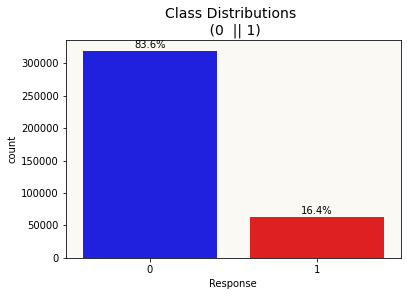

In [19]:
colors = ["blue", "red"]


ax = sns.countplot(x ='Response', data=df, palette=colors)
ax.set_facecolor('#faf9f4')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / Total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(percentage, (x, y), ha='center', va='center')
    
plt.title('Class Distributions \n (0  || 1)', fontsize=14)

**83% of target belong to class with respose zero and only 16.4% belong to response 1 class. which clearly shows classes are imbalanced.**

<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#dda15e;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px">

<h3 style="padding: 20px; color:white; text-align:center"><b> Feature Visualization</b></h3>
</div> 

[Go to Top](#0.1)

In [20]:
def feature_plot(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x =feature,data=df, palette="cool_r")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

In [21]:
def feature_plot_with_target(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.catplot(x='Response', col=feature, kind='count', data=df, palette="cool_r");
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

## Gender

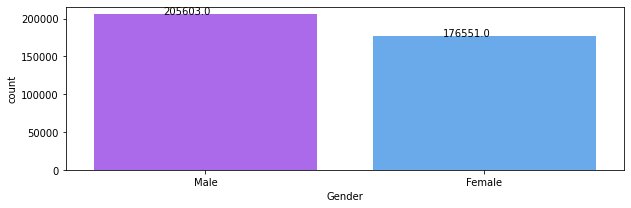

In [22]:
feature_plot('Gender')

## Gender wrt Response

<Figure size 720x216 with 0 Axes>

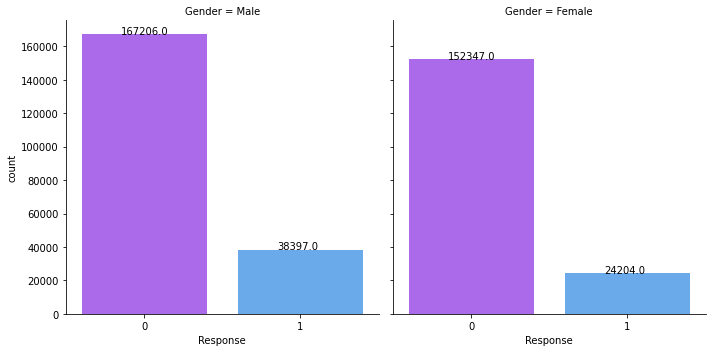

In [23]:
feature_plot_with_target('Gender')

## Driving_License

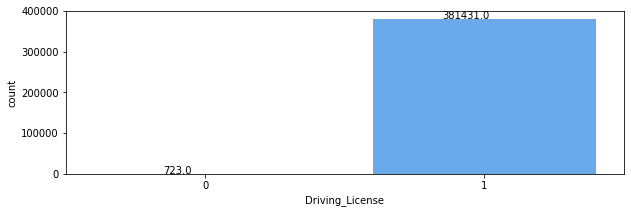

In [24]:
feature_plot('Driving_License')

## Driving_License wrt Response

<Figure size 720x216 with 0 Axes>

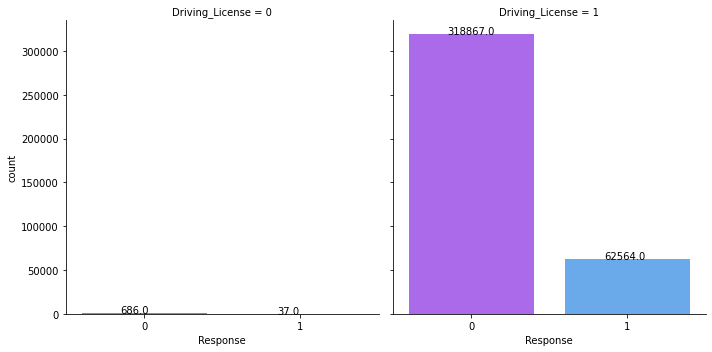

In [25]:
feature_plot_with_target('Driving_License')

## Previously_Insured

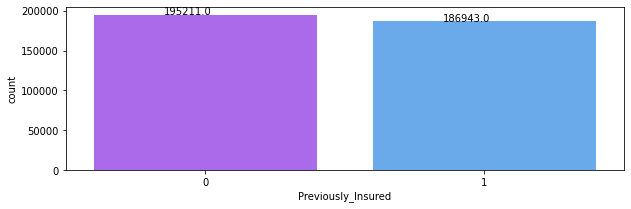

In [26]:
feature_plot('Previously_Insured')

## Previously_Insured wrt Response

<Figure size 720x216 with 0 Axes>

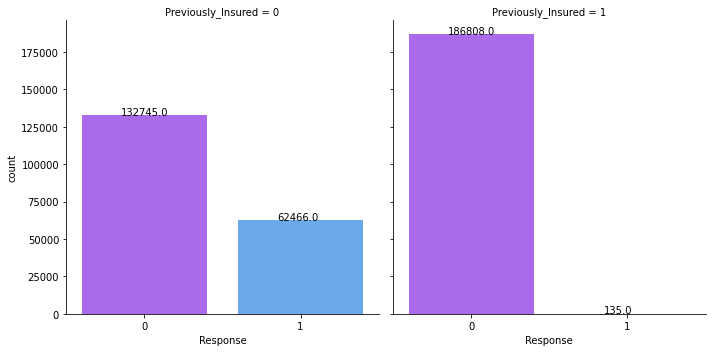

In [27]:
feature_plot_with_target('Previously_Insured')

## Vehicle_Age

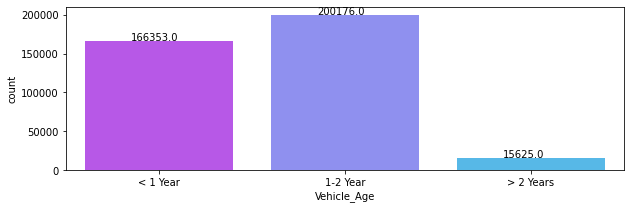

In [28]:
feature_plot('Vehicle_Age')

## Vehicle_Age wrt Response

<Figure size 720x216 with 0 Axes>

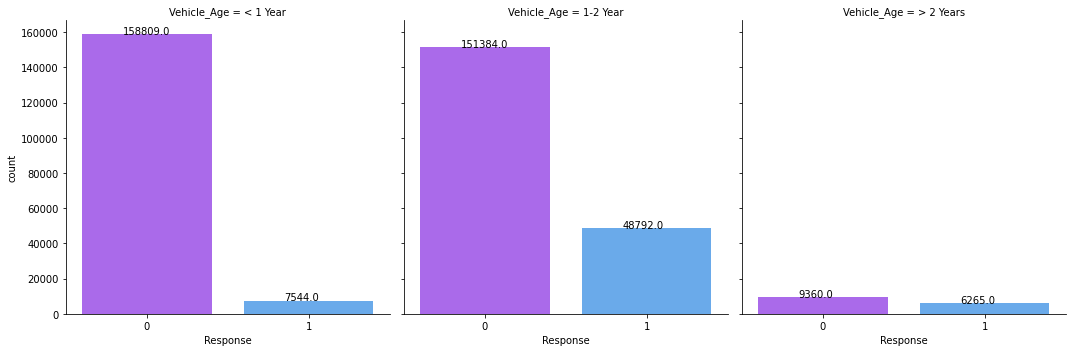

In [29]:
feature_plot_with_target('Vehicle_Age')

## Vehicle_Damage

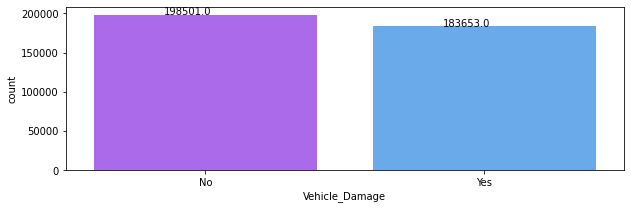

In [30]:
feature_plot('Vehicle_Damage')

## Vehicle_Damage wrt Response

<Figure size 720x216 with 0 Axes>

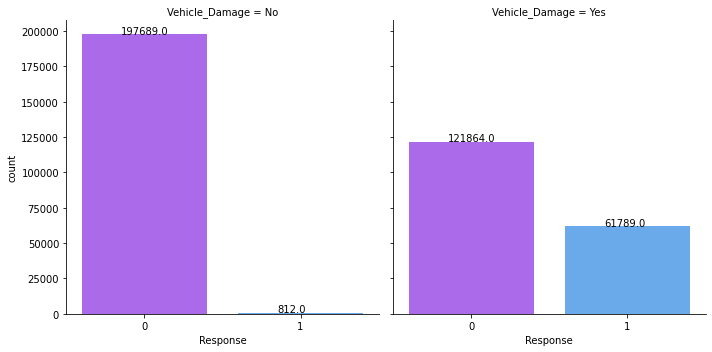

In [31]:
feature_plot_with_target('Vehicle_Damage')

## Age

In [32]:
def hist_feat(feature):
    plt.figure(figsize=(10, 3))
    sns.histplot(df[feature].dropna(),kde=True,color='purple',bins=30)

In [33]:
def dist_feat_w_target(feature):
    sns.displot(data=df, x=feature,hue='Response',kind ='kde')

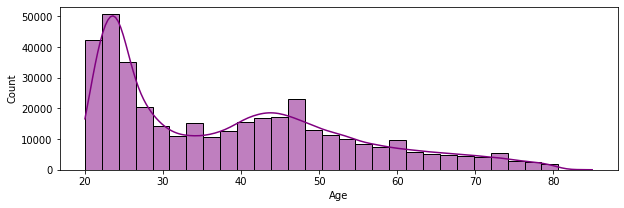

In [34]:
hist_feat('Age')

## Age wrt Response

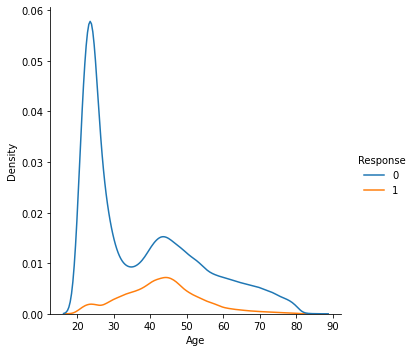

In [35]:
dist_feat_w_target('Age')

## Policy_Sales_Channel

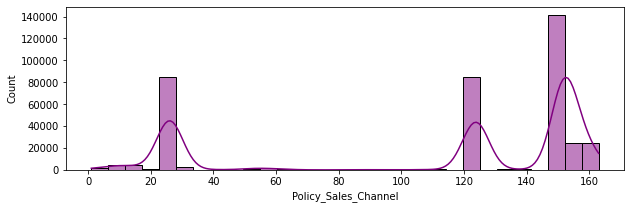

In [36]:
hist_feat('Policy_Sales_Channel')

## Policy_Sales_Channel wrt Response

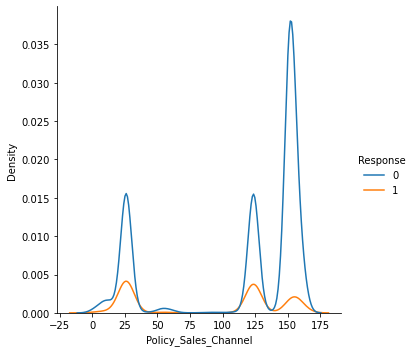

In [37]:
dist_feat_w_target('Policy_Sales_Channel')

# Annual_Premium

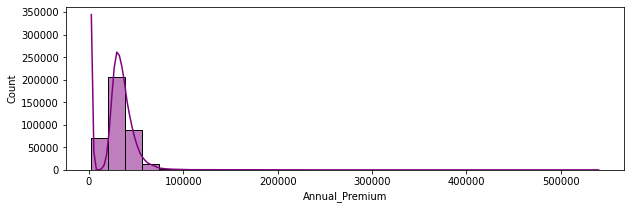

In [38]:
hist_feat('Annual_Premium')

# Annual_Premium wrt Response

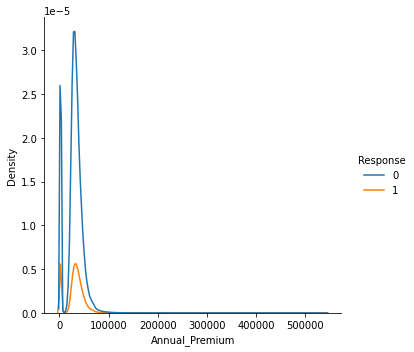

In [39]:
dist_feat_w_target('Annual_Premium')

## Top 5 Region_Code

Text(0.5, 1.0, 'Top 5 Region_Code ')

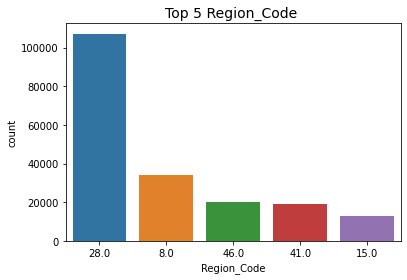

In [40]:
sns.countplot(x = 'Region_Code',data=df, order=df.Region_Code.value_counts().iloc[:5].index)
plt.title('Top 5 Region_Code ', fontsize=14) 

<a id="7"></a> <br>
# 7. Encoding Categorical Features

[Go to Top](#0.1)

In [41]:
X = df.drop(['Response'],axis = 1)
y = df['Response']

In [42]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,22,1,7.0,1,2630.0,152.0,16,1,1,0,0
1,42,1,28.0,0,43327.0,26.0,135,1,0,0,1
2,66,1,33.0,0,35841.0,124.0,253,0,0,0,1
3,22,1,33.0,0,27645.0,152.0,69,0,1,0,0
4,28,1,46.0,1,29023.0,152.0,211,1,1,0,0


<a id="8"></a> <br>
# 8. Splitting data set to training and Test set

[Go to Top](#0.1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id="9"></a> <br>
# 9. Feature Scaling

In [44]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

<a id="10"></a> <br>
# 10. Random Sampling

[Go to Top](#0.1)

<a id="10.1"></a> <br>
# 10.1 Oversample minority class

In [45]:
train_data=pd.concat([X_train,y_train],axis=1)

Response_Zero=train_data[train_data.Response==0]
Response_One=train_data[train_data.Response==1]

In [46]:
upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

In [47]:
y_train.value_counts()

0    223800
1     43707
Name: Response, dtype: int64

In [48]:
upsampled['Response'].value_counts()

0.0    223800
1.0    223800
Name: Response, dtype: int64

# Visualisation of Target of Oversampled minority class

Text(0, 0.5, 'count')

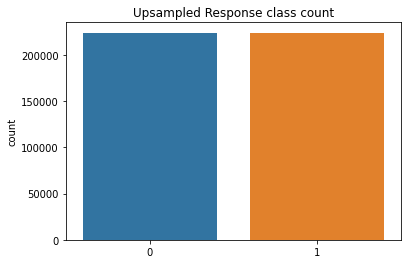

In [49]:
y1=upsampled.Response.value_counts()
sns.barplot(y=y1,x=[0,1])
plt.title('Upsampled Response class count')
plt.ylabel('count')

<a id="10.2"></a> <br>
# 10.2 Undersample majority class

[Go to Top](#0.1)

In [50]:
df['Response'].value_counts()

0    319553
1     62601
Name: Response, dtype: int64

In [51]:
downsampled_Zero = resample(Response_Zero,
                                replace = False, # sample without replacement
                                n_samples = len(Response_One), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])

In [52]:
downsampled['Response'].value_counts()

0.0    43707
1.0    43707
Name: Response, dtype: int64

Text(0, 0.5, 'count')

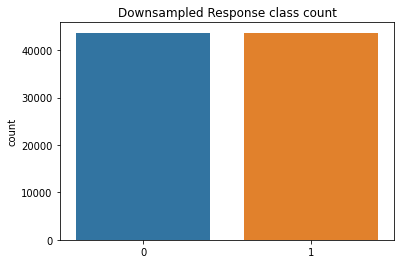

In [53]:
y2=downsampled.Response.value_counts()
sns.barplot(y=y2,x=[0,1])
plt.title('Downsampled Response class count')
plt.ylabel('count')

<a id="10.3"></a> <br>
# 10.3. SMOTE

## SMOTE model building

In [54]:
classifier = RandomForestClassifier #we will use the Random Forest classifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

In [55]:
smote_pipeline

Pipeline(steps=[('smote', SMOTE(random_state=4)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [56]:
smote_model = smote_pipeline.fit(X_train, y_train)

In [57]:
y_train.shape

(267507,)

In [58]:
smote_prediction = smote_model.predict(X_test)

In [59]:
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)

print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 319553, 1: 62601})
SMOTE data distribution: Counter({0: 319553, 1: 319553})


In [60]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
cm  = confusion_matrix(y_test, smote_prediction)
print(cm)

Confusion Matrix: 
[[84024 11729]
 [ 7952 10942]]


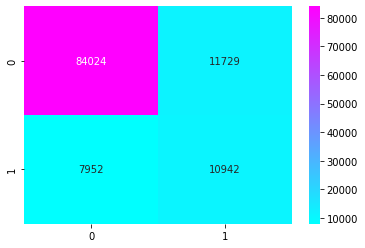

In [61]:
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.show()

In [62]:
print('Test Accuracy is  : ', (metrics.accuracy_score(y_test, smote_prediction))) 

Test Accuracy is  :  0.8283339293657924


<a id="11"></a> <br>
# 11.  Reference

https://medium.com/nerd-for-tech/class-imbalance-problem-and-ways-to-handle-it-4861a195398a

Also read my article on https://sandhyakrishnan02.medium.com/why-sampling-is-needed-different-types-of-sampling-81d58a08b4ba